---
title: Working with pyCATHY and DA 
subtitle: PART4 - Comparison SWC and ERT performance
license: CC-BY-4.0
github: https://github.com/BenjMy/ETH_pyCATHY/
subject: Tutorial
authors:
  - name: Benjamin Mary
    email: benjamin.mary@ica.csic.es
    corresponding: true
    orcid: 0000-0001-7199-2885
    affiliations:
      - ICA-CSIC
date: 2024/04/12
---

The notebooks describe: 

**Plot outputs**: analysis of the results
   - [Saturation with uncertainties](plot_states)
   - [Parameters convergence](Parm_evol)
   - [Assimilation performance](DA_perf)

In [2]:
import pyCATHY
from pyCATHY import cathy_tools
from pyCATHY.DA.cathy_DA import DA, dictObs_2pd
from pyCATHY.DA.perturbate import perturbate_parm
from pyCATHY.DA import perturbate
from pyCATHY.DA.observations import read_observations, prepare_observations, make_data_cov
from pyCATHY.DA import performance
import pyvista as pv
import pyCATHY.plotters.cathy_plots as cplt 
import os 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# set some default plotting parameters for nicer looking plots
mpl.rcParams.update({"axes.grid":True, 
                     "grid.color":"gray", 
                     "grid.linestyle":'--',
                     'figure.figsize':(6,6)}
                   )
import pandas as pd
import utils

(plot_results)=
# Analysis of the results

## Reload solution

In [3]:
simu_solution = cathy_tools.CATHY(
                                    dirName='./solution_ERT',
                                    prj_name= 'weill_dataset',
                                    notebook=True,
                                  )
sw_SOL, sw_SOL_times = simu_solution.read_outputs('sw')
psi_SOL = simu_solution.read_outputs('psi')

rootMap, rootMap_hd = simu_solution.read_inputs('root_map')

soil_SPP_SOL, soil_FP_SOL = simu_solution.read_inputs('soil',
                                                         MAXVEG=int(np.max(rootMap)),
                                                    )
PERMX_SOL = soil_SPP_SOL['PERMX'].unique()[0]
POROS_SOL = soil_SPP_SOL['POROS'].unique()[0]

🏁 Initiate CATHY object

## Reload DA results

In [4]:
simuWith_SMC_DA = DA(
                        dirName='./DA_SMC',
                        prj_name= 'Weill_example_withDA',
                        notebook=True,
                    )
simuWith_ERT_DA = DA(
                        dirName='./DA_ERT',
                        prj_name= 'Weill_example_withoutDA',
                        notebook=True,
                    )

🏁 Initiate CATHY object

🏁 Initiate CATHY object

In [5]:
results_with_SMC_DA = simuWith_SMC_DA.load_pickle_backup()
results_with_ERT_DA = simuWith_ERT_DA.load_pickle_backup()

In [57]:
meshCiPG_PGref = pv.read('./solution_ERT/meshCi.vtk')
meshLiPG_PGref = pv.read('./solution_ERT/meshLi.vtk')

yshift = 8
xshift = 8

(meshCiPG, meshLiPG) = utils.define_mesh_transformations(meshCiPG_PGref,
                                                          meshLiPG_PGref,
                                                          idC=yshift, 
                                                          idL=xshift,
                                                        )
pt1, _ = simu_solution.find_nearest_node([0,yshift,meshLiPG.points[:,2].max()])
pt2, _ = simu_solution.find_nearest_node([5,yshift,meshLiPG.points[:,2].max()])
pt3, _ = simu_solution.find_nearest_node([10,yshift,meshLiPG.points[:,2].max()])
nodes_of_interest = [pt1,pt2,pt3]
nodes_of_interest

[[2730], [976], [104]]

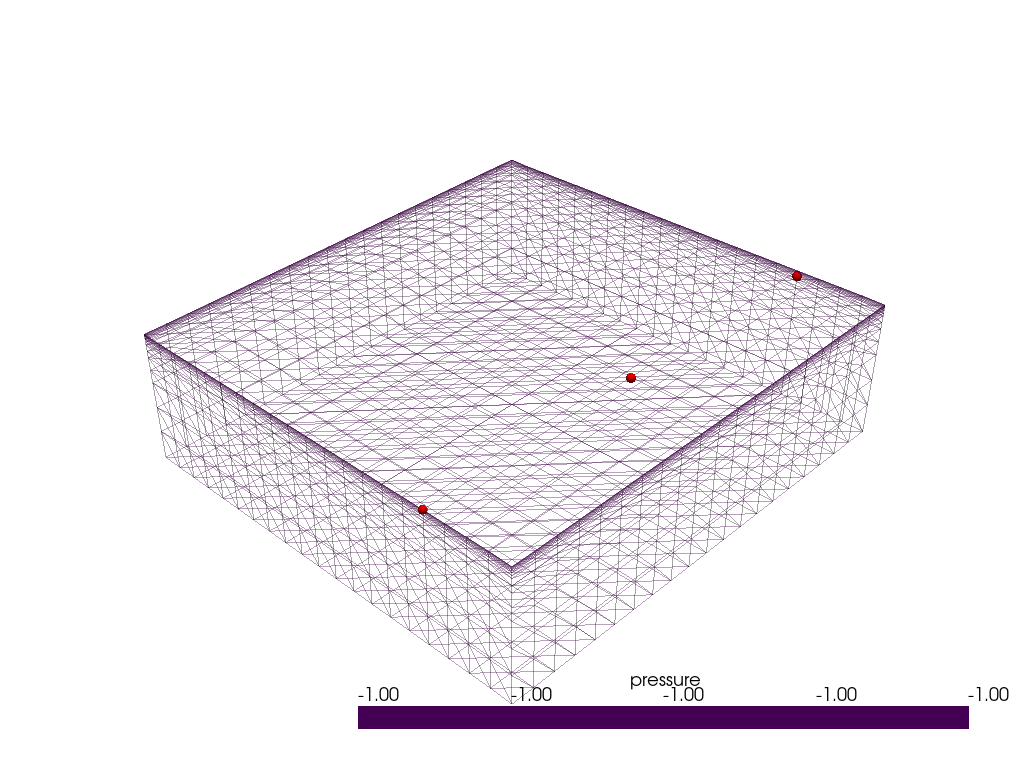

In [58]:
pl = pv.Plotter(notebook=True)

mesh = pv.read(os.path.join(simu_solution.workdir,
                            simu_solution.project_name,
                                'vtk/100.vtk',
                               )
       )

pl.add_mesh(mesh,
           opacity=0.2,
           style="wireframe",
           )

for nn in nodes_of_interest:
    pl.add_points(mesh.points[nn],
                  color='red',
                  render_points_as_spheres=True,
                  point_size=10
                  )
pl.show()

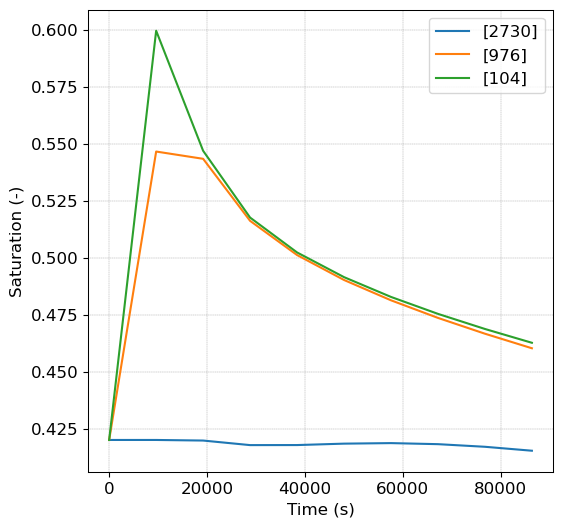

In [59]:
df_sw, sw_times = simu_solution.read_outputs('sw')

fig, ax = plt.subplots()
for nn in nodeIds:
    ax.plot(df_sw.index,
            df_sw[nn],
            label=nn
            )
ax.set_xlabel('Time (s)')
ax.set_ylabel('Saturation (-)')
plt.legend()


In [61]:
assimilation_times = observations.index.get_level_values(1).unique().to_list()
assimilation_times

[0.0,
 9600.0,
 19200.0,
 28800.0,
 38400.0,
 48000.0,
 57600.0,
 67200.0,
 76800.0,
 86400.0]

(plot_states)=
## Plot model saturation with uncertainties 

In [63]:
parm_df = pd.DataFrame.from_dict(results_withDA['dict_parm_pert'],
                                 orient='index').T
parm_df

,ic,ZROOT0
type_parm,ic,ZROOT0
nominal,-1.0,0.4
mean,-1.0,0.4
sd,1.75,0.005
units,pressure head $(m)$,$m$
sampling_type,normal,normal
ensemble_size,3,3
per_type,None,None
savefig,ic.png,ZROOT0.png
sampling_mean,-1.0,0.4


(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-2.07057372, -1.67925591, -1.2879381 , -0.89662029, -0.50530248,
        -0.11398467,  0.27733314,  0.66865095,  1.05996876,  1.45128658,
         1.84260439]),
 <BarContainer object of 10 artists>)

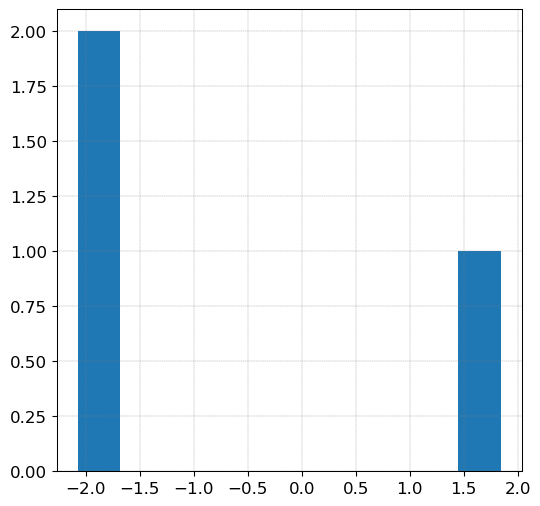

In [64]:
fig, ax = plt.subplots()
ax.hist(parm_df['ic']['ini_perturbation'])

In [65]:
#obs2plot = observations.xs('swc',level=0)
obs2plot = observations
obs2plot['saturation'] = obs2plot['data']/POROS_SOL

In [66]:
unique_times = results_withDA['df_DA']["time"].unique() -1
results_withDA['df_DA']["assimilation_times"] = results_withDA['df_DA']["time"].map(dict(zip(unique_times, 
                                                                               assimilation_times))
                                                                     )

In [67]:
nodes_of_interest

[[2730], [976], [104]]

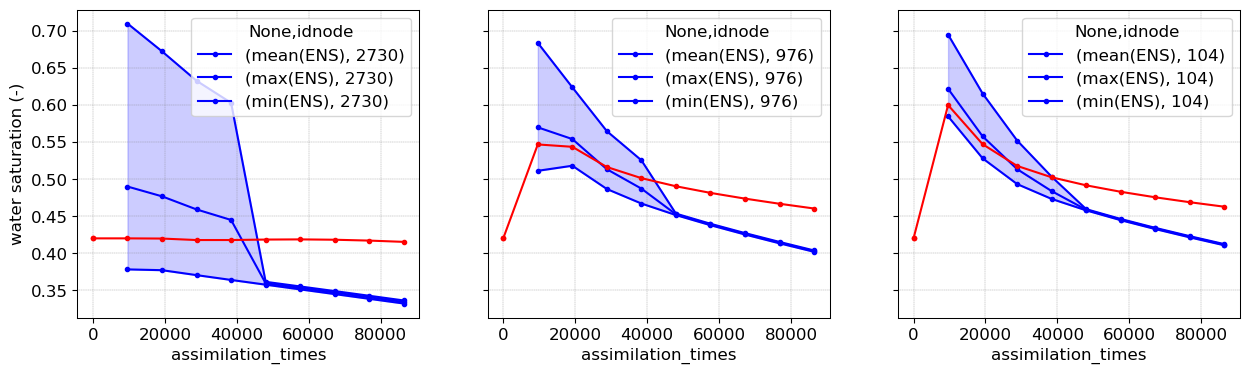

In [71]:
fig, axs = plt.subplots(1,3,figsize=(15,4),
                       sharey=True
                       )
for axi, NOI in zip(axs, nodes_of_interest):
    cplt.DA_plot_time_dynamic(results_withDA['df_DA'],
                              'sw',
                              NOI,
                              ax=axi,
                              keytime='assimilation_times',
                              )  
    axi.plot(sw_SOL.index,
            sw_SOL.iloc[:,NOI],
            color='r',
            marker= '.'
            )

In [72]:
unique_times = results_withoutDA['df_DA']["time"].unique() -1
results_withoutDA['df_DA']["assimilation_times"] = results_withoutDA['df_DA']["time"].map(dict(zip(unique_times, 
                                                                               assimilation_times))
                                                                     )

KeyError: (slice(None, None, None), [2730])

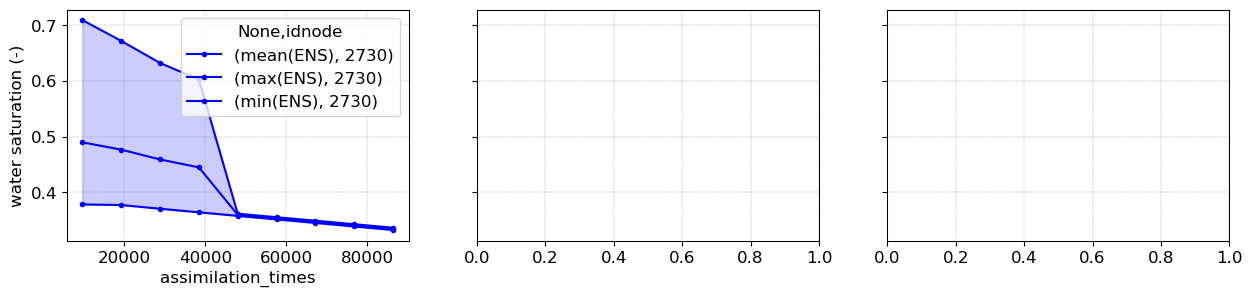

In [73]:
fig, axs = plt.subplots(1,3,figsize=(15,3),
                       sharey=True
                       )
for axi, NOI in zip(axs, nodes_of_interest):
    cplt.DA_plot_time_dynamic(results_withoutDA['df_DA'],
                              'sw',
                              NOI,
                              ax=axi,
                              keytime='assimilation_times',
                              )  
    axi.plot(sw_SOL.index,
            sw_SOL.iloc[:,NOI],
            color='r',
            marker= '.'
            )

(DA_perf)= 
## Plot DA performance

/home/z0272571a@CAMPUS.CSIC.ES/Nextcloud/BenCSIC/Codes/BenjMy/pycathy_wrapper/pyCATHY/plotters/cathy_plots.py:1465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perf_plot["RMSE" + sensorName] = df_perf_plot["RMSE" + sensorName].astype(
/home/z0272571a@CAMPUS.CSIC.ES/Nextcloud/BenCSIC/Codes/BenjMy/pycathy_wrapper/pyCATHY/plotters/cathy_plots.py:1468: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perf_plot["NMRMSE" + sensorName] = df_perf_plot["NMRMSE" + sensorName].astype(
/home/z0272571a@CAMPUS.CSIC.

(array([<Axes: xlabel='assimilation #', ylabel='RMSEswc2'>,
        <Axes: xlabel='assimilation #', ylabel='NMRMSEswc2'>], dtype=object),
 <module 'matplotlib.pyplot' from '/home/z0272571a@CAMPUS.CSIC.ES/miniconda3/envs/pgCATHY/lib/python3.11/site-packages/matplotlib/pyplot.py'>)

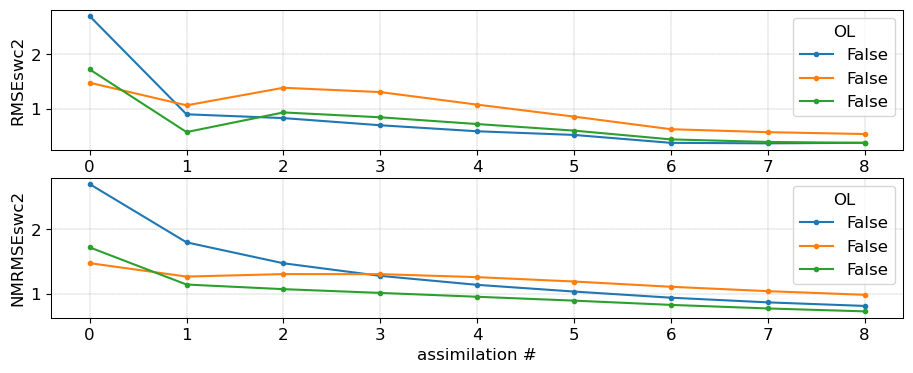

In [37]:
fig, ax = plt.subplots(2,figsize=[11,4])
cplt.DA_RMS(results_withDA['df_performance'],'swc',ax=ax)
cplt.DA_RMS(results_withDA['df_performance'],'swc1',ax=ax)
cplt.DA_RMS(results_withDA['df_performance'],'swc2',ax=ax)

(Parm_evol)=
## Plot parameters convergence

In [ ]:
fig, axs = plt.subplots(2,1,figsize=[11,4],
                        # sharex=True
                        )
cplt.DA_plot_parm_dynamic_scatter(parm = 'ZROOT', 
                                  dict_parm_pert=results['dict_parm_pert'], 
                                  list_assimilation_times = assimilation_times,
                                  ax=axs[0],
                                          )   
axs[0].plot(np.linspace(1,len(assimilation_times), len(assimilation_times)),
            [POROS_SOL]*len(assimilation_times))
